In [3]:
from statsbombpy import sb as StatsBomb
import pandas as pd

### Get the Premier League 2015/2016 season `Competition` DataFrame

In [4]:
competitions = StatsBomb.competitions()
competition = competitions[(competitions["competition_name"] == "Premier League") & (competitions["season_name"] == "2015/2016")]
competition = competition.reset_index(drop=True)
competition

/Users/carlos/Projects/football-data/.env/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,2,27,England,Premier League,male,False,False,2015/2016,2024-06-12T07:43:56.243851,2021-06-13T16:17:31.694,None,2024-06-12T07:43:56.243851


### Get all the matches for the competition

In [5]:

matches = StatsBomb.matches(competition_id=competition.at[0, "competition_id"], season_id=competition.at[0, "season_id"])
matches

/Users/carlos/Projects/football-data/.env/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [6]:
YARDS_TO_METERS_CONVERSION_FACTOR = 0.9144

def yards_to_meters(yards: float) -> float:
    return yards * YARDS_TO_METERS_CONVERSION_FACTOR

def meters_to_yards(meters: float) -> float:
    return meters / YARDS_TO_METERS_CONVERSION_FACTOR


In [7]:
LONG_PASS_TRESHOLD_DISTANCE = meters_to_yards(50) # meters

In [8]:

# successful_long_balls: list[tuple[tuple[float, float], tuple[float, float], bool]] = []

# for match_index, match in enumerate(matches.itertuples()):
#     events = StatsBomb.events(match_id=match.match_id)

#     passes = [_event for _event in events.itertuples() if _event.type == "Pass"]
#     long_balls = [_pass for _pass in passes if _pass.pass_type == "Goal Kick"]
#     successful_passes = [(_pass.location, _pass.pass_end_location, False if 'pass_goal_assist' not in _pass._asdict() else False if pd.isna(_pass.pass_goal_assist) else True) for _pass in long_balls if pd.isna(_pass.pass_outcome)]

#     successful_long_balls.extend(successful_passes)

In [23]:
# load data from json
import json
with open("data.json", "r") as f:
    successful_long_balls = json.load(f)
    
len(successful_long_balls)


3149

In [22]:
# Show me the percentage of goal kicks that land on the right side of the pitch and left side of the pitch.
# The coordinates are in the format (x, y) where x is the horizontal distance from the left side of the pitch and y is the vertical distance from the bottom of the pitch.
# The pitch is 120 meters wide and 80 meters tall.

# Calculate the percentage of goal kicks that land on the right side of the pitch
right_side_goal_kicks = [data for data in successful_long_balls if data[1][1] > 40]
right_side_goal_kicks_percentage = len(right_side_goal_kicks) / len(successful_long_balls) * 100
print(f"Percentage of goal kicks that land on the right side of the pitch: {right_side_goal_kicks_percentage:.2f}%")

# Calculate the percentage of goal kicks that land on the left side of the pitch
left_side_goal_kicks = [data for data in successful_long_balls if data[1][1] <= 40]
left_side_goal_kicks_percentage = len(left_side_goal_kicks) / len(successful_long_balls) * 100
print(f"Percentage of goal kicks that land on the left side of the pitch: {left_side_goal_kicks_percentage:.2f}%")

print(len(right_side_goal_kicks), len(left_side_goal_kicks))


Percentage of goal kicks that land on the right side of the pitch: 54.05%
Percentage of goal kicks that land on the left side of the pitch: 45.95%
1702 1447


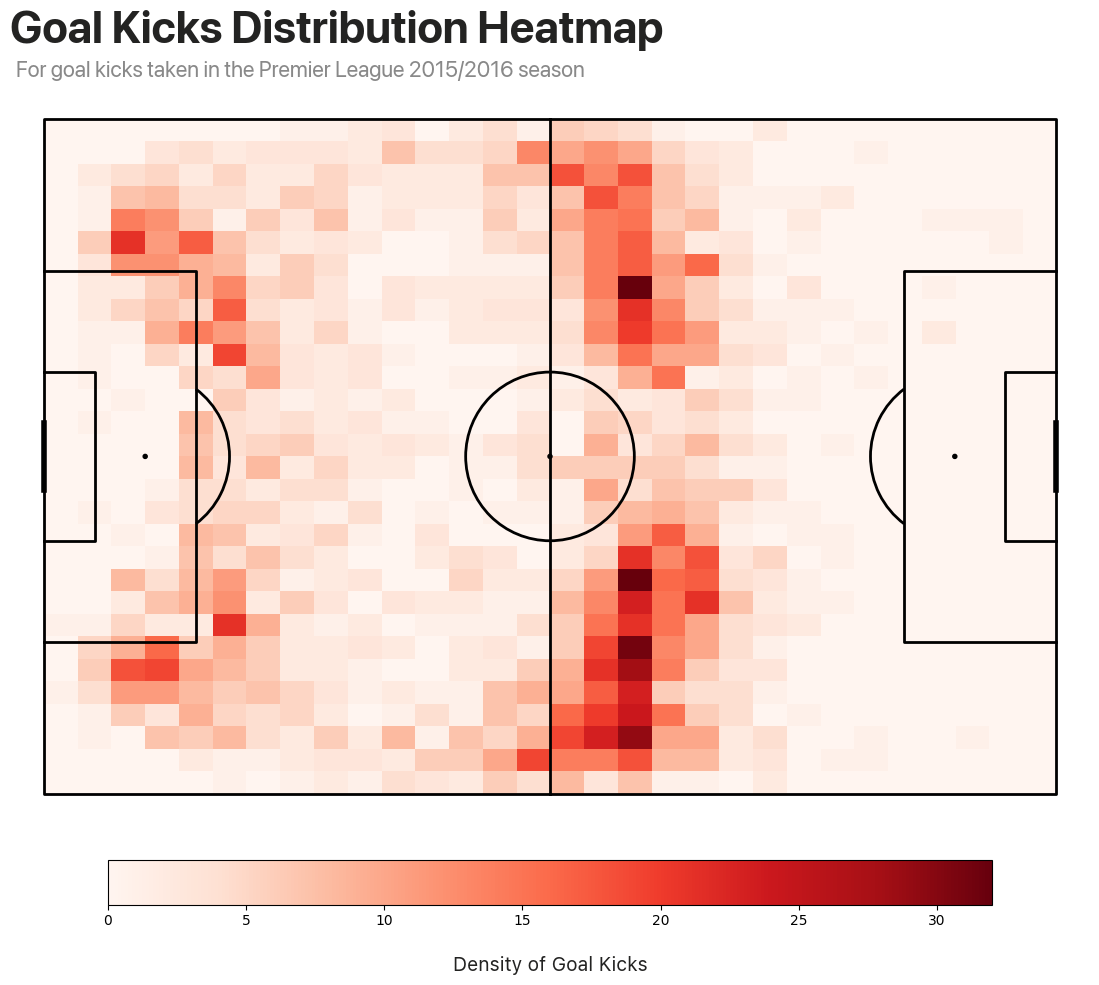

In [11]:
import matplotlib.pyplot as plt
import mplsoccer
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Extract the end positions (the last two elements in each entry)
goal_kicks_end = np.array([data[1] for data in successful_long_balls])

# Create the pitch using mplsoccer
pitch = mplsoccer.Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(20, 10))

# Add title and subtitle
plt.suptitle('Goal Kicks Distribution Heatmap', 
             fontsize=32, 
             fontweight='bold', 
             family='SF Pro Display', 
             color="#232322",
             x=0.23,                    # Add this line
             horizontalalignment='left' # Add this line
)
plt.title('For goal kicks taken in the Premier League 2015/2016 season', 
         fontsize=16, 
         color='#898989', 
         family='SF Pro Display',
         x=0.005,                    # Add this line
         horizontalalignment='left' # Add this line
)

# Plot the heatmap
grid_size = 30
x_bin_edges = np.linspace(0, 120, grid_size+1)  # Updated to match pitch width (120)
y_bin_edges = np.linspace(0, 80, grid_size+1)   # Updated to match pitch height (80)

# Compute the 2D histogram (heatmap) data
heatmap_data, _, _ = np.histogram2d(goal_kicks_end[:, 0], goal_kicks_end[:, 1], bins=[x_bin_edges, y_bin_edges])

# Plot the heatmap with squares
cax = ax.imshow(heatmap_data.T, cmap='Reds', interpolation='nearest', origin='lower', extent=[0, 120, 0, 80])

# Add a color bar for the heatmap
cb = fig.colorbar(cax, ax=ax, orientation='horizontal', fraction=0.054, pad=0.04)
cb.set_label('Density of Goal Kicks', fontsize=14, color='#232322', family='SF Pro Text', labelpad=20)


# Show the plot
plt.tight_layout()

# Save the plot
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')